# 4.10 Task Part 1 (notebook 8)

## Table of Contents
### 4.10 Task Part 1 -- Question 8 (customer profiles with regions and departments)
### Stacked horizontal bar chart for customer profiles by region
### Horizontal bar charts for customer profiles in each region individually (4 charts)
### Stacked horizontal bar chart for total orders by department and normalized customer profiles
### Horizontal grouped bar chart looking at Young People with and without dependents by region
### Horizontal goruped bar chart looking at all customers with and without dependents normalized by region
### Horizontal grouped bar chart showing orders by department for customers with and without dependents
### Horizontal grouped bar chart showing orders by department normalized by customers with and without dependents
### Bar chart for total orders for the babies department normalized by those with and without dependents
### Bar chart for total orders from the babies department for those with and without dependents (not normalized)
### Bar chart for age vs. snacks orders
### Bar chart for age vs. snacks orders normalized by age range
### Bar chart for income vs. snacks orders
### Bar chart for income vs. snacks orders normalized by income level
### Bar chart for total orders from the snacks department for those with and without dependents (not normalized)
### Bar chart for total orders for the snacks department normalized by those with and without dependents
### Horizontal bar chart showing customer profiles agains the snacks department (totals)
### Horizontal bar chart showing customer profiles against the snacks department normalized by customer profiles
### Grouped bar chart showing total snack sales by 'age_range' and 'income_flag'
### Stacked bar chart showing total snack sales by 'age_range' and 'income_flag' (normalized)

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path

path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 4\Instacart Basket Analysis'

In [3]:
# Importing data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Removing the limit to columns and rows displayed so I can see all the rows and columns going forward

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
# Checking data frame

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_range,department,order_total,income_flag,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,31.6,below average,"young, below average income, has dependents"
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,35.4,below average,"young, below average income, has dependents"
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,28.2,below average,"young, below average income, has dependents"
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,26.0,below average,"young, below average income, has dependents"
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,57.0,below average,"young, below average income, has dependents"


In [5]:
df.shape

(30964564, 38)

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [6]:
# I'm skipping #7 for now because it is taking too long to run. I'm moving on to #8 and will return to #7 after 
# getting tutor help.

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

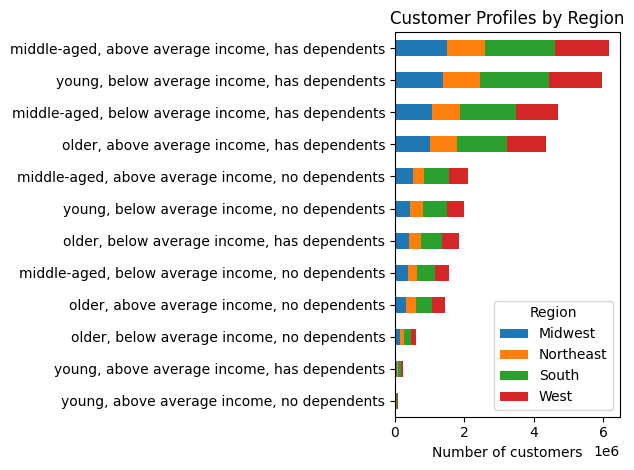

In [7]:
# Make customer profiles by region stacked bar chart

# Group by 'customer_profile' and 'Region', and count the occurrences
profile_region_counts = df.groupby(['customer_profile', 'Region']).size().unstack()

# Calculate the total number of customer profiles for each region
total_customers = profile_region_counts.sum(axis=1)

# Sort the data by total orders in descending order
sorted_data = profile_region_counts.loc[total_customers.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart
ax = sorted_data.plot.barh(stacked=True)

# Add labels and a title
plt.xlabel('Number of customers')
plt.ylabel('')
plt.title('Customer Profiles by Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add a legend
plt.legend(title='Region')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_region.png'), bbox_inches='tight', pad_inches=0.1)

In [9]:
sorted_data

Region,Midwest,Northeast,South,West
customer_profile,,,,
"middle-aged, above average income, has dependents",1495816,1111579,1995389,1572584
"young, below average income, has dependents",1389990,1053294,1995716,1520219
"middle-aged, below average income, has dependents",1063815,808033,1609615,1215729
"older, above average income, has dependents",1023654,777011,1437359,1101172
"middle-aged, above average income, no dependents",512275,338507,701137,543158
"young, below average income, no dependents",443330,372691,668786,497202
"older, below average income, has dependents",410311,328957,613365,481757
"middle-aged, below average income, no dependents",373688,253684,528079,403637
"older, above average income, no dependents",320907,272443,464153,371472


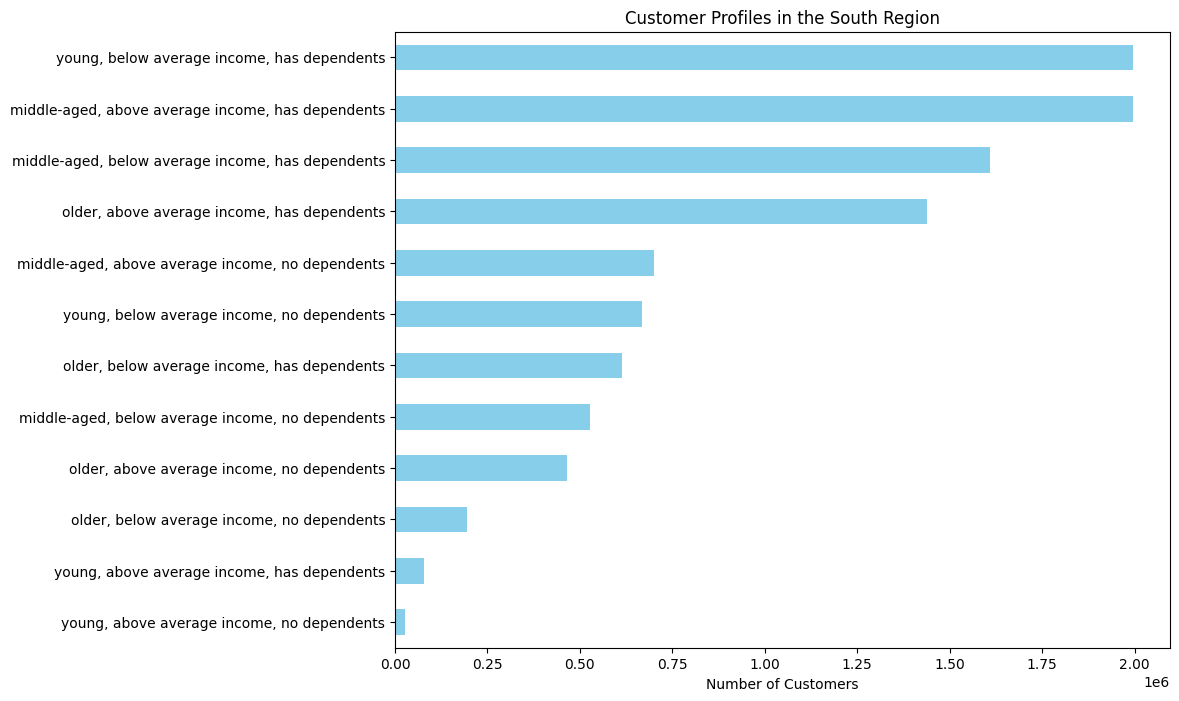

In [35]:
# Customer profiles by 'South' horizontal bar chart

# Filter the DataFrame for the 'Midwest' region
south_data = df[df['Region'] == 'South']

# Get the counts of each 'customer_profile' within the 'South' region
south_profile_counts = south_data['customer_profile'].value_counts()

# Plotting horizontal bar chart for 'customer_profile' counts in the 'South' region
plt.figure(figsize=(10, 8)) 

south_profile_counts.plot(kind='barh', color='skyblue')

# Add labels and a title
plt.xlabel('Number of Customers')
plt.ylabel('')
plt.title('Customer Profiles in the South Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_in_south.png'), bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

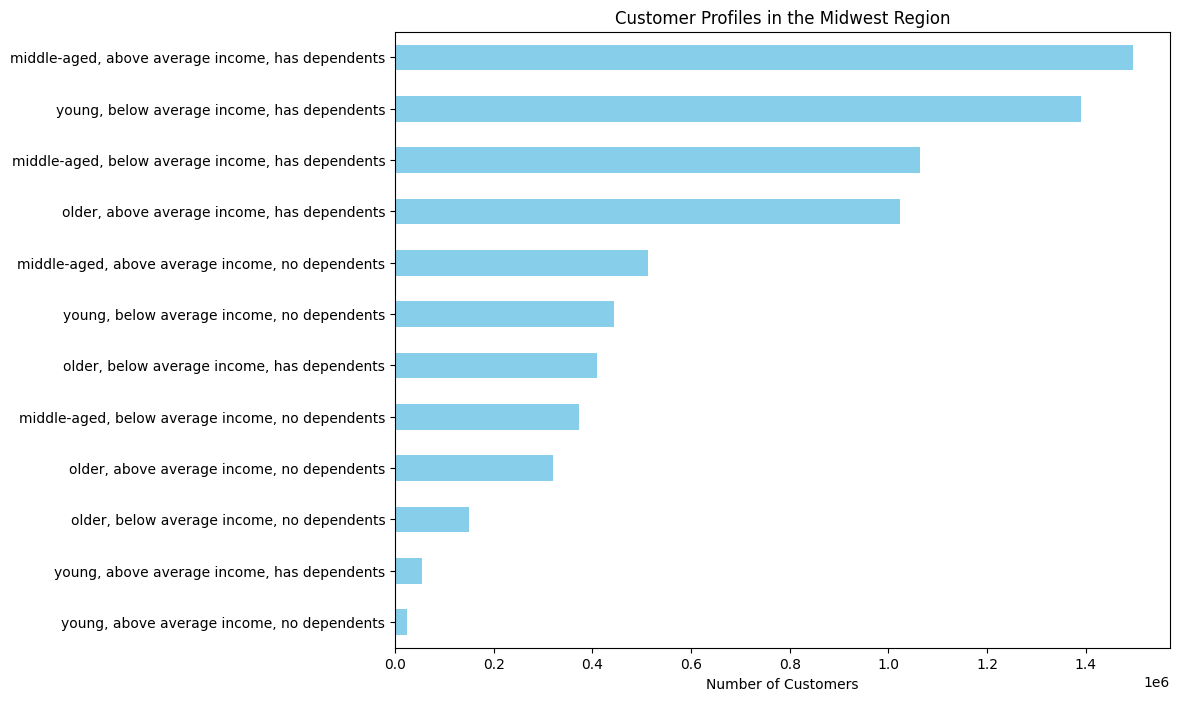

In [33]:
# Customer profiles by 'Midwest' horizontal bar chart

# Filter the DataFrame for the 'Midwest' region
midwest_data = df[df['Region'] == 'Midwest']

# Get the counts of each 'customer_profile' within the 'Midwest' region
midwest_profile_counts = midwest_data['customer_profile'].value_counts()

# Plotting horizontal bar chart for 'customer_profile' counts in the 'Midwest' region
plt.figure(figsize=(10, 8)) 

midwest_profile_counts.plot(kind='barh', color='skyblue')

# Add labels and a title
plt.xlabel('Number of Customers')
plt.ylabel('')
plt.title('Customer Profiles in the Midwest Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_in_midwest.png'), bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

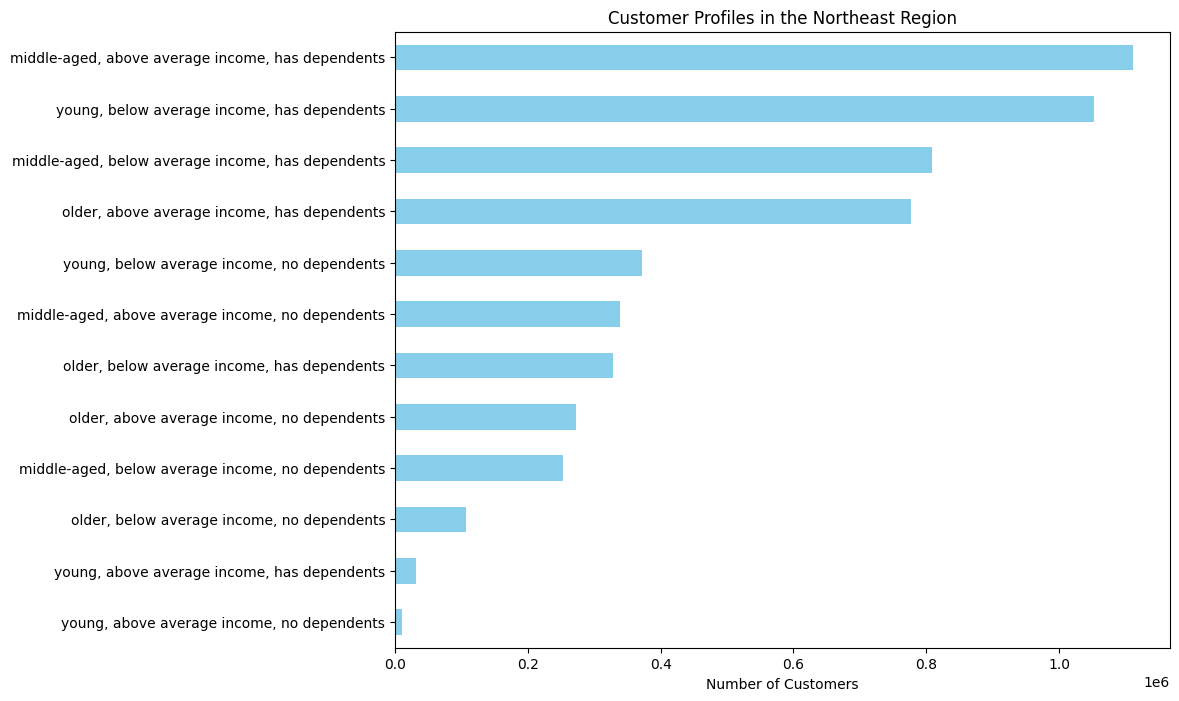

In [36]:
# Customer profiles by 'Northeast' horizontal bar chart

# Filter the DataFrame for the 'Northeast' region
northeast_data = df[df['Region'] == 'Northeast']

# Get the counts of each 'customer_profile' within the 'Northeast' region
northeast_profile_counts = northeast_data['customer_profile'].value_counts()

# Plotting horizontal bar chart for 'customer_profile' counts in the 'Northeast' region
plt.figure(figsize=(10, 8)) 

northeast_profile_counts.plot(kind='barh', color='skyblue')

# Add labels and a title
plt.xlabel('Number of Customers')
plt.ylabel('')
plt.title('Customer Profiles in the Northeast Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_in_northeast.png'), bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

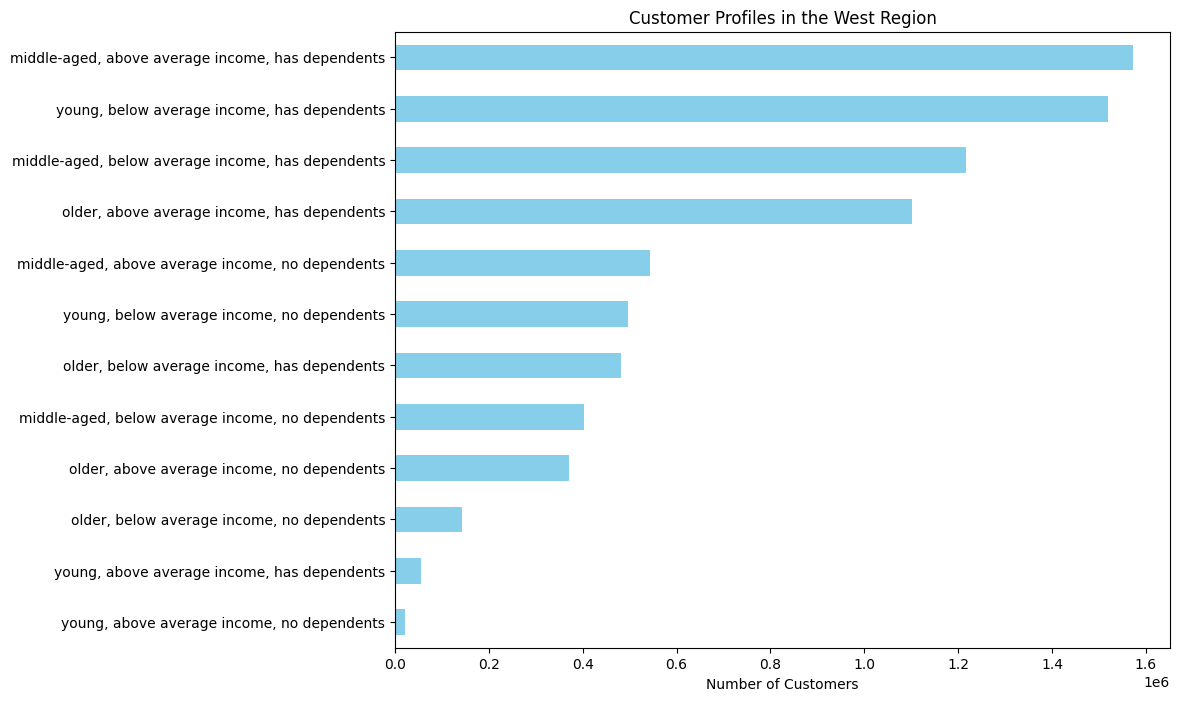

In [37]:
# Customer profiles by 'West' horizontal bar chart

# Filter the DataFrame for the 'West' region
west_data = df[df['Region'] == 'West']

# Get the counts of each 'customer_profile' within the 'West' region
west_profile_counts = west_data['customer_profile'].value_counts()

# Plotting horizontal bar chart for 'customer_profile' counts in the 'Northeast' region
plt.figure(figsize=(10, 8)) 

west_profile_counts.plot(kind='barh', color='skyblue')

# Add labels and a title
plt.xlabel('Number of Customers')
plt.ylabel('')
plt.title('Customer Profiles in the West Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_in_west.png'), bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

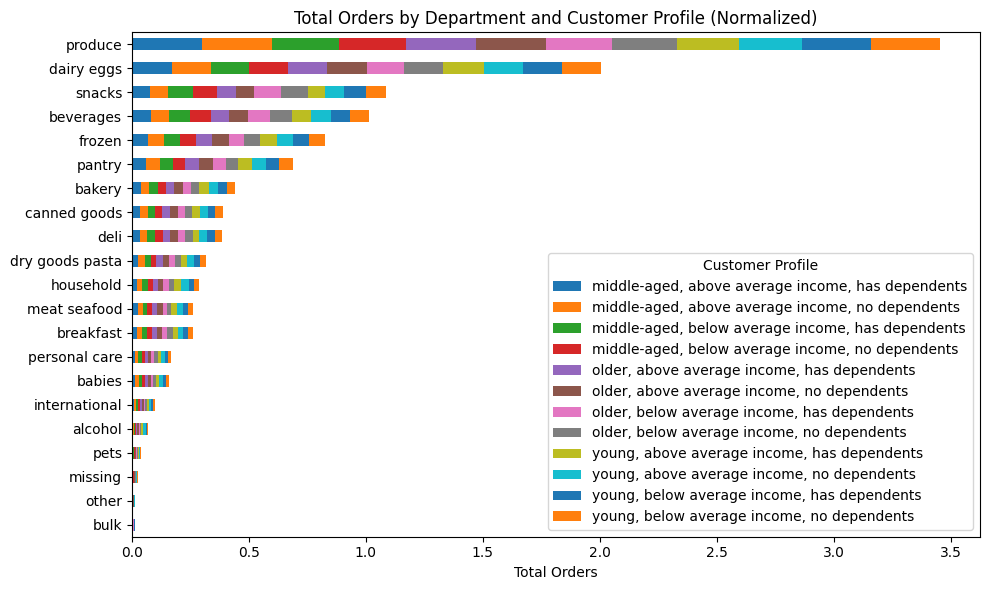

In [38]:
# Make a bar chart for total orders by department and normalized customer profiles

# Group by 'department' and 'customer_profile', and count the occurrences
department_profile_counts = df.groupby(['department', 'customer_profile']).size().unstack()

# Normalize the data along the vertical axis (columns/customer_profile)
normalized_data = department_profile_counts.div(department_profile_counts.sum(axis=0), axis=1)

# Sort the data by total orders in descending order
total_orders = department_profile_counts.sum(axis=1)
sorted_data = normalized_data.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart with normalized regions
ax = sorted_data.plot.barh(stacked=True, figsize=(10, 6))

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add labels and a title
plt.xlabel('Total Orders')
plt.ylabel('')
plt.title('Total Orders by Department and Customer Profile (Normalized)')

# Add a legend with a title
plt.legend(title='Customer Profile', loc='lower right')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department_and_profile_normalized.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()


In [39]:
sorted_data

customer_profile,"middle-aged, above average income, has dependents","middle-aged, above average income, no dependents","middle-aged, below average income, has dependents","middle-aged, below average income, no dependents","older, above average income, has dependents","older, above average income, no dependents","older, below average income, has dependents","older, below average income, no dependents","young, above average income, has dependents","young, above average income, no dependents","young, below average income, has dependents","young, below average income, no dependents"
department,,,,,,,,,,,,
produce,0.298170,0.299011,0.285744,0.287421,0.298591,0.302204,0.282038,0.275303,0.267030,0.268673,0.293445,0.294586
dairy eggs,0.169373,0.169165,0.163224,0.164045,0.169759,0.168482,0.159539,0.165340,0.175831,0.166244,0.168193,0.167429
snacks,0.077462,0.077294,0.104980,0.105333,0.077986,0.078817,0.114402,0.114116,0.076499,0.080957,0.090524,0.089495
beverages,0.079212,0.079611,0.088543,0.089157,0.078935,0.079295,0.094235,0.093311,0.081210,0.085470,0.081938,0.082711
frozen,0.069563,0.069244,0.067473,0.066921,0.069424,0.069983,0.066453,0.069311,0.073128,0.068548,0.068243,0.067228
pantry,0.059304,0.059114,0.055455,0.054713,0.058986,0.058907,0.054894,0.053221,0.059526,0.058934,0.057454,0.057624
bakery,0.036957,0.037945,0.035039,0.034510,0.036973,0.036455,0.034423,0.034276,0.041541,0.040675,0.035898,0.036507
canned goods,0.034293,0.033819,0.030490,0.030745,0.034396,0.033146,0.029173,0.029306,0.034822,0.033673,0.032832,0.032665
deli,0.032320,0.032872,0.032287,0.033384,0.032726,0.032660,0.031523,0.031532,0.028822,0.033747,0.032395,0.032464


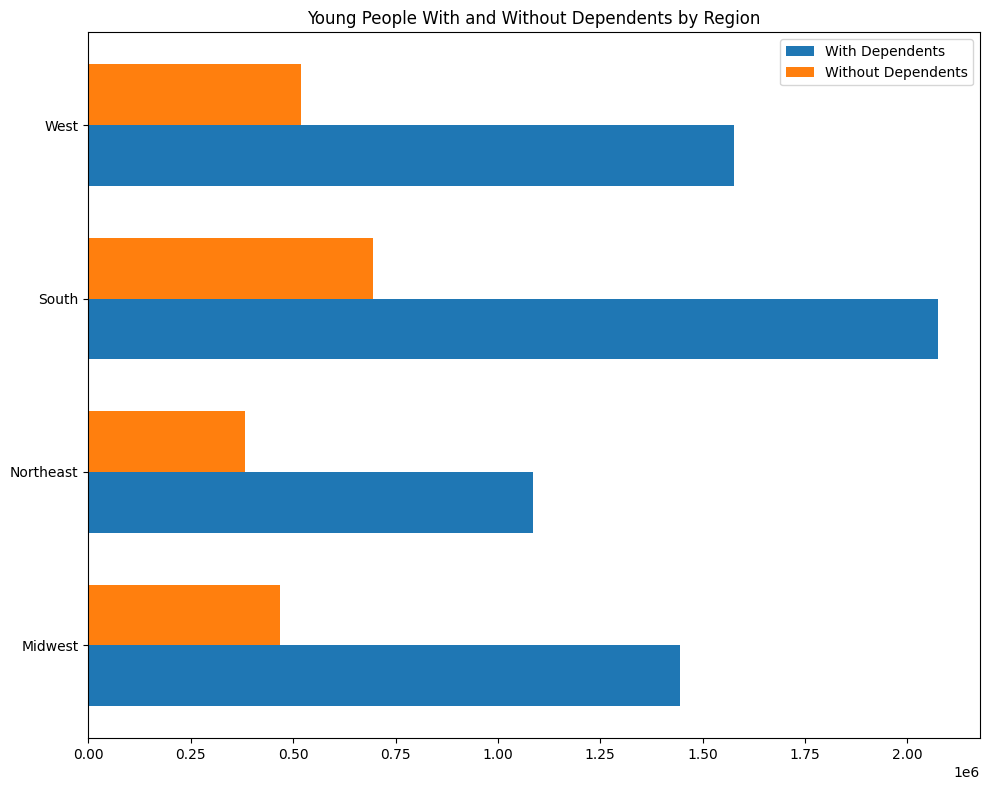

In [12]:
# Creating a bar chart looking at Young People with and without dependents by region

# Filter the DataFrame for Young individuals
young_data = df[df['age_range'].str.contains('Young')]

# Grouping by 'region', counting Young individuals with and without dependents
grouped = young_data.groupby(['Region']).agg(
    Young_With_Dependents=('number_of_dependents', lambda x: (x > 0).sum()),
    Young_No_Dependents=('number_of_dependents', lambda x: (x == 0).sum())
).reset_index()

fig, ax = plt.subplots(figsize=(10, 8))

regions = grouped['Region']
bar_width = 0.35
index = np.arange(len(regions))  # Creating an array for the bar positions

# Plotting the grouped bars for Young with dependents and Young without dependents
ax.barh(index - bar_width/2, grouped['Young_With_Dependents'], bar_width, label='With Dependents')
ax.barh(index + bar_width/2, grouped['Young_No_Dependents'], bar_width, label='Without Dependents')

ax.set_yticks(index)
ax.set_yticklabels(regions)
ax.set_xlabel('')
ax.set_title('Young People With and Without Dependents by Region')
ax.legend()

plt.tight_layout()
plt.show()


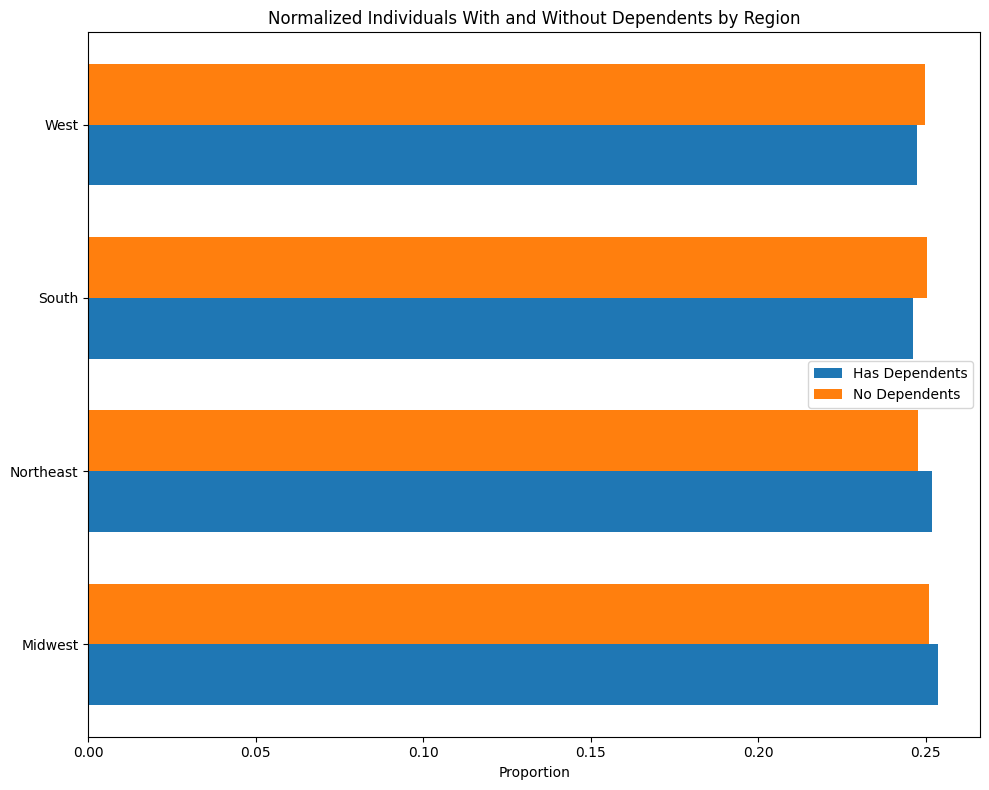

In [20]:
# Chart looking at all customers with and without dependents normalized by region

# Grouping by 'Region' and 'number_of_dependents', counting occurrences
grouped = df.groupby(['Region', 'number_of_dependents']).size().unstack(fill_value=0)

# Calculating the total count of individuals in each region
total_counts = grouped.sum(axis=1)

# Normalizing the counts based on the total count of individuals in each region
normalized_grouped = grouped.div(total_counts, axis=0)

# Creating the grouped horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.35
regions = normalized_grouped.index
index = np.arange(len(regions))  # Creating an array for the bar positions

# Plotting the normalized grouped horizontal bars for 'has dependents' and 'no dependents' by region
ax.barh(index - bar_width/2, normalized_grouped[1], bar_width, label='Has Dependents')
ax.barh(index + bar_width/2, normalized_grouped[0], bar_width, label='No Dependents')

ax.set_ylabel('')
ax.set_xlabel('Proportion')
ax.set_title('Normalized Individuals With and Without Dependents by Region')
ax.set_yticks(index)
ax.set_yticklabels(regions)
ax.legend()

plt.tight_layout()
plt.show()


### There does not seem to be a significant difference between the numbers of customers with and without dependents based on region.

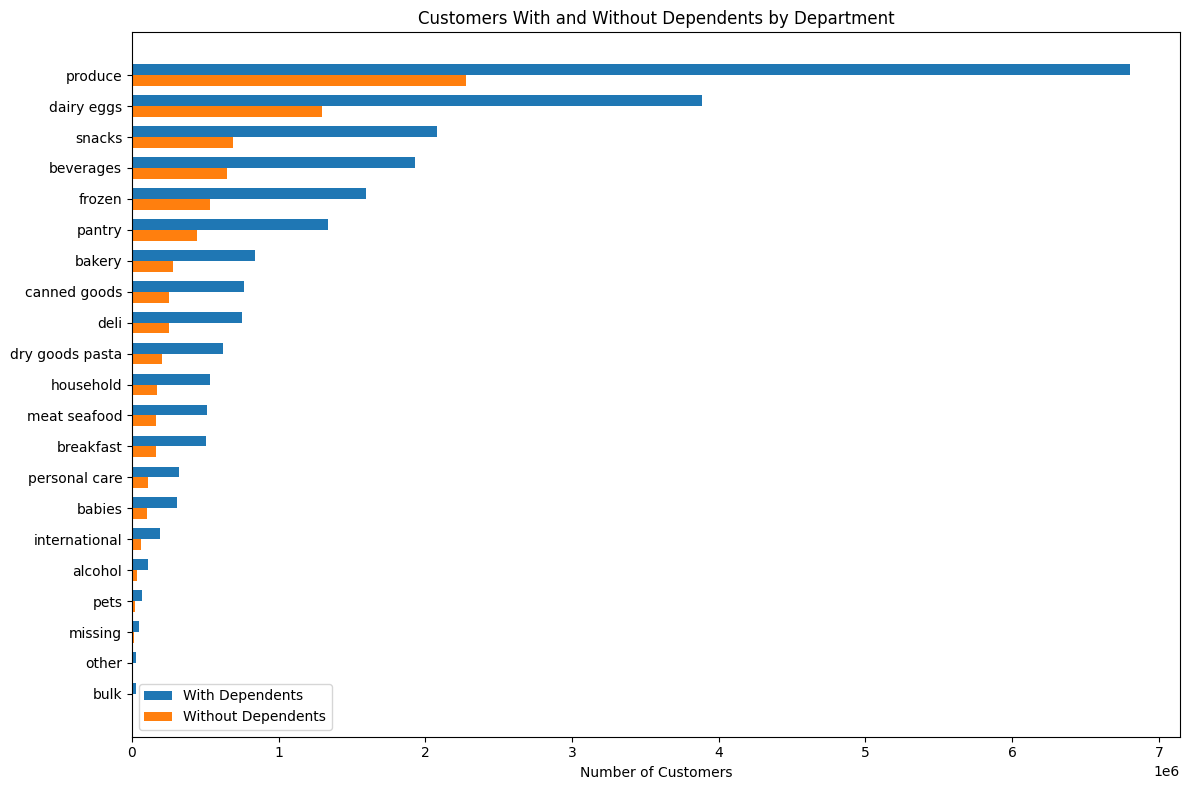

In [26]:
# Chart showing orders by department for customers with and without dependents

# Categorizing individuals into 'With Dependents' and 'Without Dependents'
df['Dependent_Category'] = np.where(df['number_of_dependents'] > 0, 'With Dependents', 'Without Dependents')

# Grouping by 'department' and 'Dependent_Category', counting occurrences
grouped = df.groupby(['department', 'Dependent_Category']).size().unstack(fill_value=0)

# Calculating the total count of customers (with and without dependents) for each department
grouped['Total'] = grouped.sum(axis=1)

# Sorting the DataFrame by the total counts in descending order
grouped = grouped.sort_values('Total', ascending=False)

# Creating the grouped horizontal bar chart without normalization
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
departments = grouped.index
index = np.arange(len(departments))  # Creating an array for the bar positions

# Plotting the grouped horizontal bars for 'with dependents' and 'without dependents' by department
ax.barh(index - bar_width/2, grouped['With Dependents'], bar_width, label='With Dependents')
ax.barh(index + bar_width/2, grouped['Without Dependents'], bar_width, label='Without Dependents')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

ax.set_ylabel('')
ax.set_xlabel('Number of Customers')
ax.set_title('Customers With and Without Dependents by Department')
ax.set_yticks(index)
ax.set_yticklabels(departments)
ax.legend()

plt.tight_layout()
plt.show()


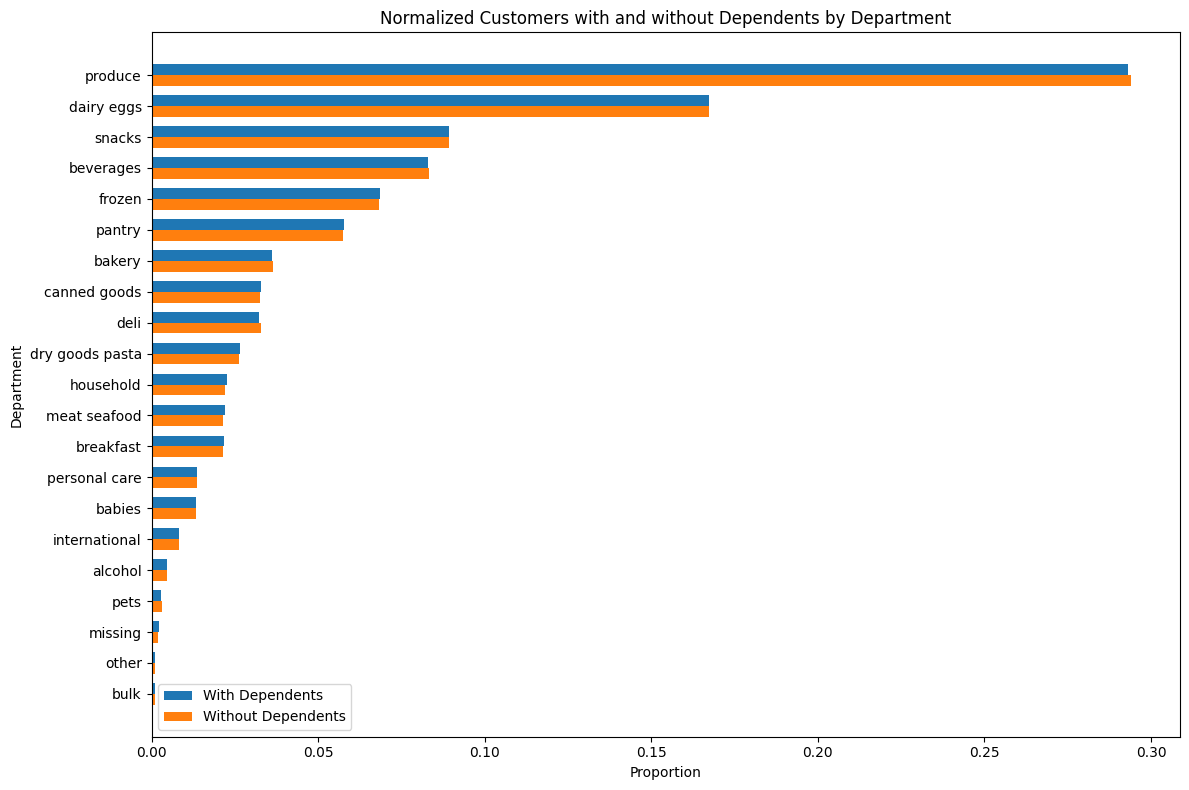

In [29]:
# Horizontal grouped bar chart showing orders by department normalized by customers with and without dependents


# Categorizing individuals into 'With Dependents' and 'Without Dependents'
df['Dependent_Category'] = np.where(df['number_of_dependents'] > 0, 'With Dependents', 'Without Dependents')

# Grouping by 'department' and 'Dependent_Category', counting occurrences
grouped = df.groupby(['department', 'Dependent_Category']).size().unstack(fill_value=0)

# Calculating the total count of customers with and without dependents
total_dependents = grouped['With Dependents'].sum()
total_no_dependents = grouped['Without Dependents'].sum()

# Normalizing the counts based on the total count of customers with and without dependents
normalized_grouped = grouped.div([total_dependents, total_no_dependents], axis=1)

# Sort by total counts (with and without dependents) in descending order
normalized_grouped['Total'] = normalized_grouped.sum(axis=1)
normalized_grouped = normalized_grouped.sort_values('Total', ascending=False)

# Creating the grouped horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
departments = normalized_grouped.index
index = np.arange(len(departments))  # Creating an array for the bar positions

# Plotting the normalized grouped horizontal bars for 'with dependents' and 'without dependents' by department
ax.barh(index - bar_width/2, normalized_grouped['With Dependents'], bar_width, label='With Dependents')
ax.barh(index + bar_width/2, normalized_grouped['Without Dependents'], bar_width, label='Without Dependents')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

ax.set_ylabel('Department')
ax.set_xlabel('Proportion')
ax.set_title('Normalized Customers with and without Dependents by Department')
ax.set_yticks(index)
ax.set_yticklabels(departments)
ax.legend()

plt.tight_layout()
plt.show()


In [30]:
normalized_grouped

Dependent_Category,With Dependents,Without Dependents,Total
department,,,
produce,0.292954,0.293997,0.586951
dairy eggs,0.167183,0.167239,0.334422
snacks,0.089386,0.089208,0.178593
beverages,0.082952,0.083381,0.166333
frozen,0.068564,0.068394,0.136958
pantry,0.057645,0.057354,0.114999
bakery,0.036144,0.036357,0.072501
canned goods,0.032769,0.032433,0.065202
deli,0.032312,0.032738,0.065050


### There doesn't appear to be much difference between department orders for those with and without dependents.

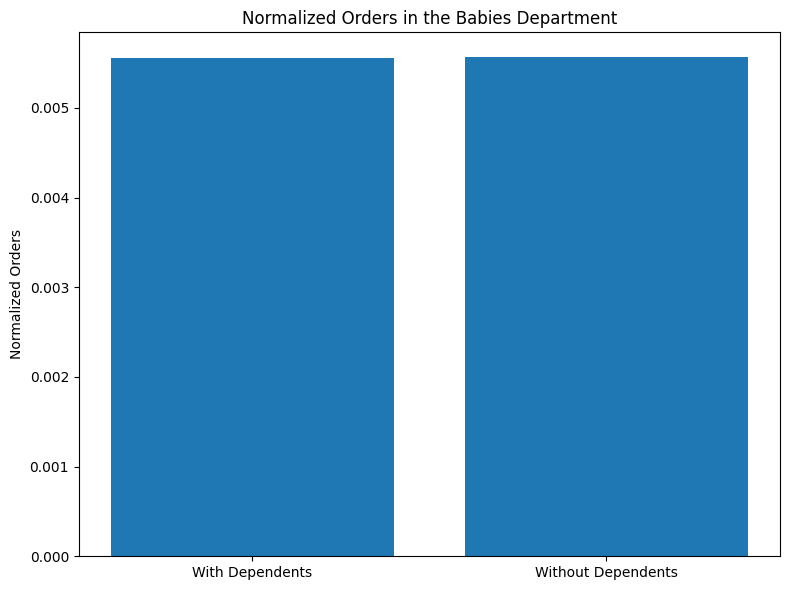

In [35]:
# Bar chart for total orders for the babies department normalized by those with and without dependents

# Filter the data for the 'babies' department
babies_data = df[df['department'] == 'babies']

# Count the unique orders for customers with and without dependents in the 'babies' department
orders_with_dependents = babies_data[babies_data['number_of_dependents'] > 0]['order_id'].nunique()
orders_without_dependents = babies_data[babies_data['number_of_dependents'] == 0]['order_id'].nunique()

# Calculate the total count of customers with and without dependents
total_customers_with_dependents = df[df['number_of_dependents'] > 0].shape[0]
total_customers_without_dependents = df[df['number_of_dependents'] == 0].shape[0]

# Normalize the number of orders by the total count of customers with and without dependents
normalized_orders_with = orders_with_dependents / total_customers_with_dependents
normalized_orders_without = orders_without_dependents / total_customers_without_dependents

# Create a vertical bar chart
labels = ['With Dependents', 'Without Dependents']
heights = [normalized_orders_with, normalized_orders_without]

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Normalized Orders')
plt.xlabel('')
plt.title('Normalized Orders in the Babies Department')

plt.tight_layout()
plt.show()


In [42]:
normalized_orders_with

0.005555980626468603

In [39]:
normalized_orders_without

0.0055640536089278094

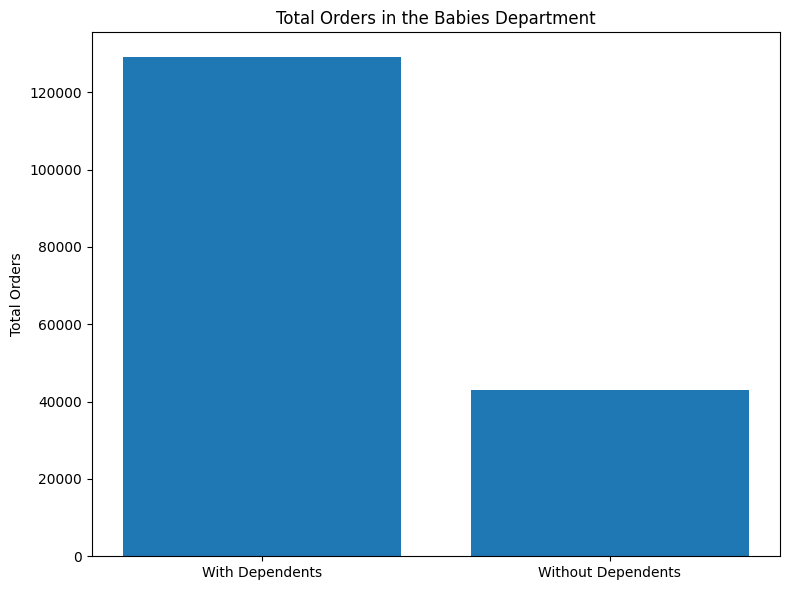

In [36]:
# Bar chart for total orders from the babies department for those with and without dependents (not normalized)

# Filter the data for the 'babies' department
babies_data = df[df['department'] == 'babies']

# Count the unique orders for customers with and without dependents in the 'babies' department
orders_with_dependents = babies_data[babies_data['number_of_dependents'] > 0]['order_id'].nunique()
orders_without_dependents = babies_data[babies_data['number_of_dependents'] == 0]['order_id'].nunique()

# Create a vertical bar chart
labels = ['With Dependents', 'Without Dependents']
heights = [orders_with_dependents, orders_without_dependents]

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Total Orders')
plt.xlabel('')
plt.title('Total Orders in the Babies Department')

plt.tight_layout()
plt.show()


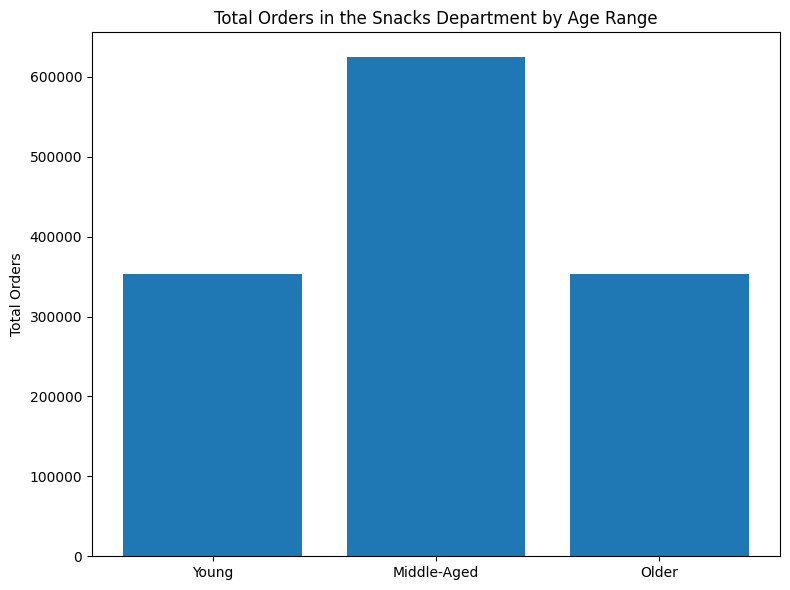

In [48]:
# Bar chart for age vs. snacks orders

# Filter the data for the 'snacks' department
snacks_data = df[df['department'] == 'snacks']

# Count the unique orders for 'Young' and 'Older' customer profiles in the 'snacks' department
orders_young = snacks_data[snacks_data['age_range'] == 'Young']['order_id'].nunique()
orders_middle = snacks_data[snacks_data['age_range'] == 'Middle-Aged']['order_id'].nunique()
orders_older = snacks_data[snacks_data['age_range'] == 'Older']['order_id'].nunique()

# Create a vertical bar chart
labels = ['Young', 'Middle-Aged', 'Older']
heights = [orders_young, orders_middle, orders_older]

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Total Orders')
plt.xlabel('')
plt.title('Total Orders in the Snacks Department by Age Range')

plt.tight_layout()
plt.show()


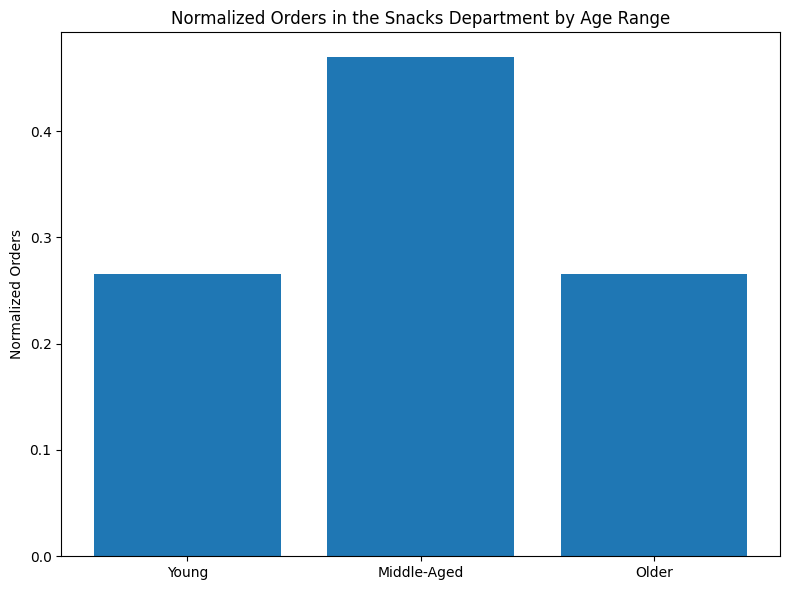

In [76]:
# Bar chart for age vs. snacks orders normalized by age range

# Filter the data for the 'snacks' department
snacks_data = df[df['department'] == 'snacks']

# Count the total orders in the 'snacks' department
total_orders_snacks = snacks_data['order_id'].nunique()

# Count the unique orders for each age range in the 'snacks' department
orders_young = snacks_data[snacks_data['age_range'] == 'Young']['order_id'].nunique()
orders_middle = snacks_data[snacks_data['age_range'] == 'Middle-Aged']['order_id'].nunique()
orders_older = snacks_data[snacks_data['age_range'] == 'Older']['order_id'].nunique()

# Normalize the number of orders by the total count of orders in the 'snacks' department
normalized_orders = [orders_young / total_orders_snacks, 
                      orders_middle / total_orders_snacks, 
                      orders_older / total_orders_snacks]

# Create a vertical bar chart
labels = ['Young', 'Middle-Aged', 'Older']
heights = normalized_orders

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Normalized Orders')
plt.xlabel('')
plt.title('Normalized Orders in the Snacks Department by Age Range')

plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'snack_orders_age_normalized.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()


In [52]:
normalized_orders

[0.26508529501727396, 0.4693506846823692, 0.2655640203003569]

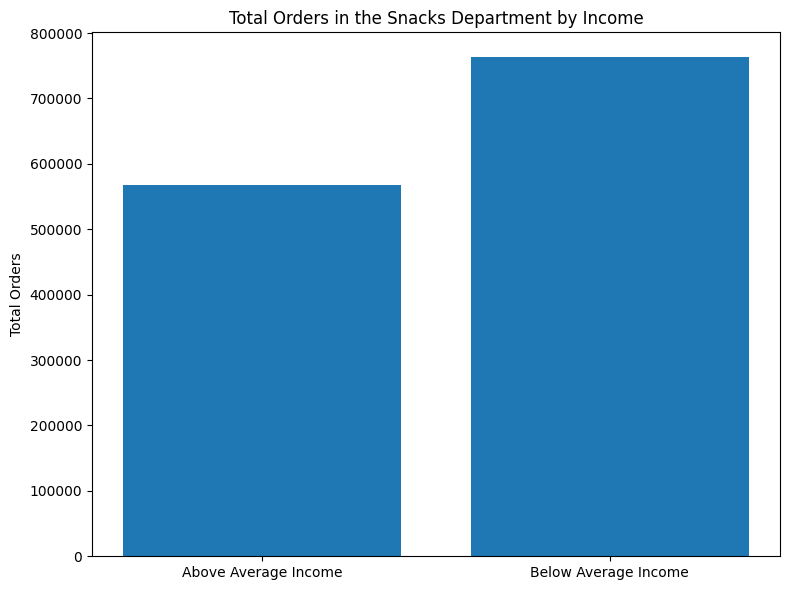

In [53]:
# Bar chart for income vs. snacks orders

# Filter the data for the 'snacks' department
snacks_data = df[df['department'] == 'snacks']

# Count the unique orders for 'above average' and 'below average' customer income in the 'snacks' department
orders_above = snacks_data[snacks_data['income_flag'] == 'above average']['order_id'].nunique()
orders_below = snacks_data[snacks_data['income_flag'] == 'below average']['order_id'].nunique()

# Create a vertical bar chart
labels = ['Above Average Income', 'Below Average Income']
heights = [orders_above, orders_below]

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Total Orders')
plt.xlabel('')
plt.title('Total Orders in the Snacks Department by Income')

plt.tight_layout()
plt.show()


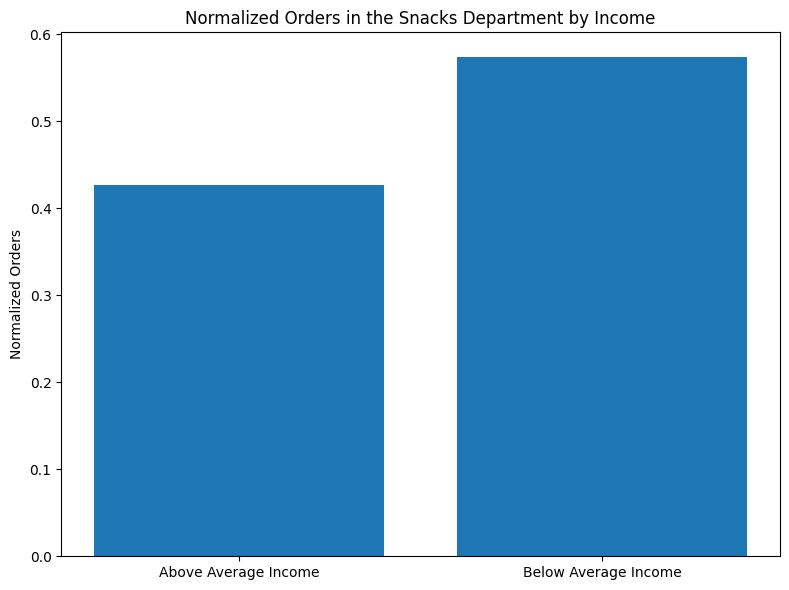

In [57]:
# Bar chart for income vs. snacks orders normalized by income level

# Filter the data for the 'snacks' department
snacks_data = df[df['department'] == 'snacks']

# Count the total orders in the 'snacks' department
total_orders_snacks = snacks_data['order_id'].nunique()

# Count the unique orders for 'above average' and 'below average' customer income in the 'snacks' department
orders_above = snacks_data[snacks_data['income_flag'] == 'above average']['order_id'].nunique()
orders_below = snacks_data[snacks_data['income_flag'] == 'below average']['order_id'].nunique()

# Normalize the number of orders by the total count of orders in the 'snacks' department
normalized_orders = [orders_above / total_orders_snacks, orders_below / total_orders_snacks]

# Create a vertical bar chart
labels = ['Above Average Income', 'Below Average Income']
heights = normalized_orders

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Normalized Orders')
plt.xlabel('')
plt.title('Normalized Orders in the Snacks Department by Income')

plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'snack_orders_by_income_normalized.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()



In [56]:
normalized_orders

[0.4265667731586174, 0.5734332268413826]

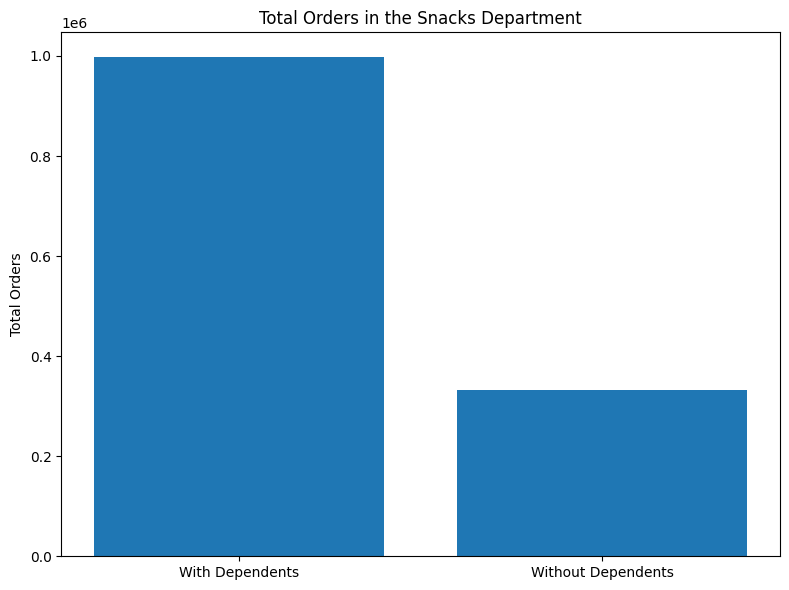

In [58]:
# Bar chart for total orders from the snacks department for those with and without dependents (not normalized)

# Filter the data for the 'snacks' department
snacks_data = df[df['department'] == 'snacks']

# Count the unique orders for customers with and without dependents in the 'snacks' department
orders_with_dependents = snacks_data[snacks_data['number_of_dependents'] > 0]['order_id'].nunique()
orders_without_dependents = snacks_data[snacks_data['number_of_dependents'] == 0]['order_id'].nunique()

# Create a vertical bar chart
labels = ['With Dependents', 'Without Dependents']
heights = [orders_with_dependents, orders_without_dependents]

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Total Orders')
plt.xlabel('')
plt.title('Total Orders in the Snacks Department')

plt.tight_layout()
plt.show()

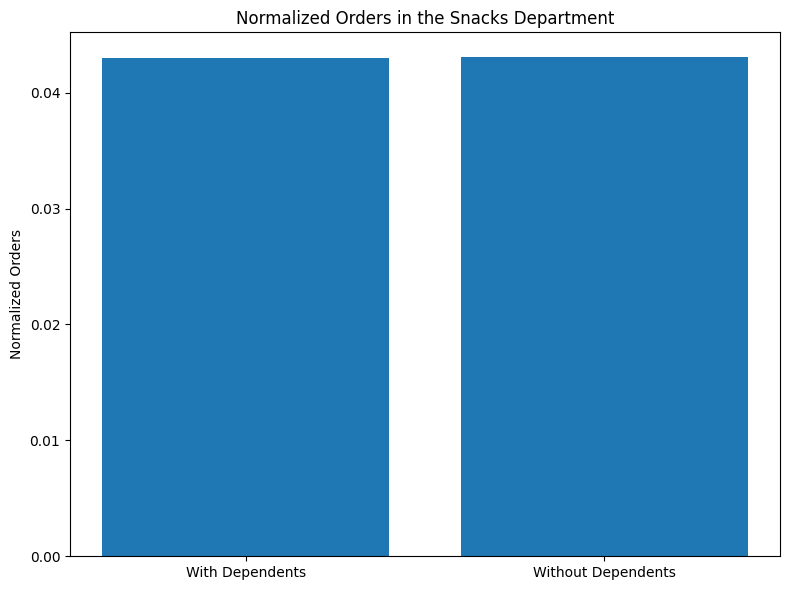

In [62]:
# Bar chart for total orders for the snacks department normalized by those with and without dependents

# Filter the data for the 'snacks' department
snacks_data = df[df['department'] == 'snacks']

# Count the unique orders for customers with and without dependents in the 'snacks' department
orders_with_dependents = snacks_data[snacks_data['number_of_dependents'] > 0]['order_id'].nunique()
orders_without_dependents = snacks_data[snacks_data['number_of_dependents'] == 0]['order_id'].nunique()

# Calculate the total count of customers with and without dependents
total_customers_with_dependents = df[df['number_of_dependents'] > 0].shape[0]
total_customers_without_dependents = df[df['number_of_dependents'] == 0].shape[0]

# Normalize the number of orders by the total count of customers with and without dependents
normalized_orders_with = orders_with_dependents / total_customers_with_dependents
normalized_orders_without = orders_without_dependents / total_customers_without_dependents

# Create a vertical bar chart
labels = ['With Dependents', 'Without Dependents']
heights = [normalized_orders_with, normalized_orders_without]

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Normalized Orders')
plt.xlabel('')
plt.title('Normalized Orders in the Snacks Department')

plt.tight_layout()
plt.show()


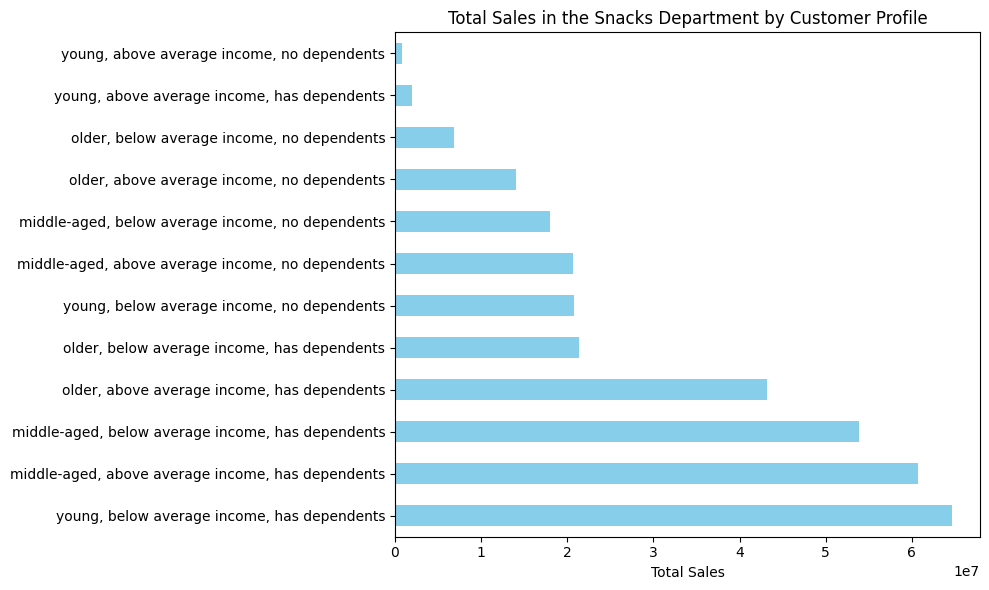

In [63]:
# Horizontal bar chart showing customer profiles agains the snacks department (totals)

# Filter the data for the 'snacks' department
snacks_data = df[df['department'] == 'snacks']

# Merge order_total with the snacks_data
snacks_sales = snacks_data.groupby(['order_id', 'customer_profile'])['order_total'].sum().reset_index()

# Group sales by customer profile in the 'snacks' department
sales_by_profile = snacks_sales.groupby('customer_profile')['order_total'].sum().sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sales_by_profile.plot(kind='barh', color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('')
plt.title('Total Sales in the Snacks Department by Customer Profile')

plt.tight_layout()
plt.show()


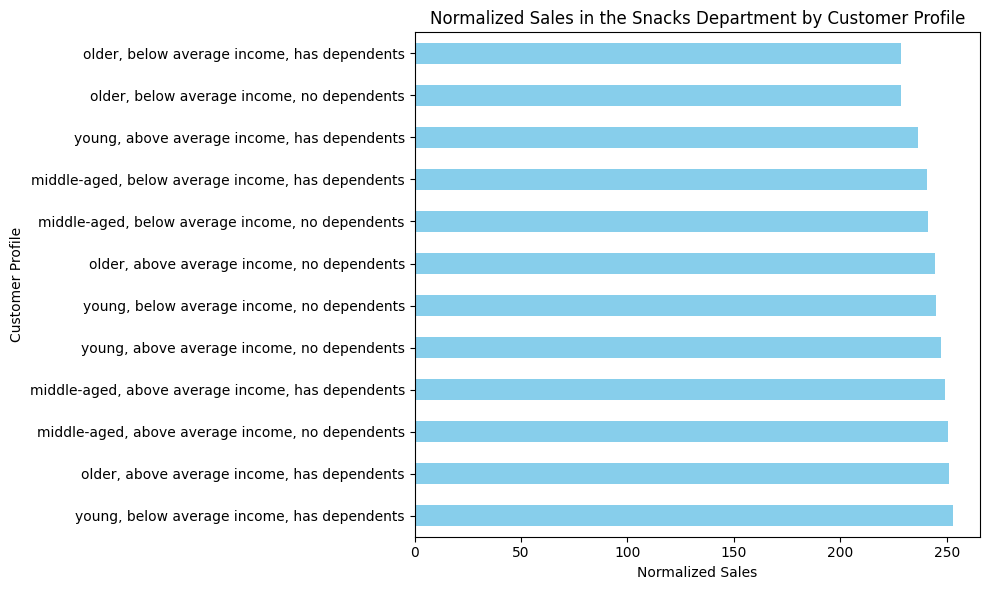

In [64]:
# Horizontal bar chart showing customer profiles against the snacks department normalized by customer profiles

# Filter the data for the 'snacks' department
snacks_data = df[df['department'] == 'snacks']

# Merge order_total with the snacks_data
snacks_sales = snacks_data.groupby(['order_id', 'customer_profile'])['order_total'].sum().reset_index()

# Calculate the total sales for each customer profile in the 'snacks' department
sales_by_profile = snacks_sales.groupby('customer_profile')['order_total'].sum()

# Count the unique customers for each profile in the 'snacks' department
customers_by_profile = snacks_sales['customer_profile'].value_counts()

# Normalize the total sales by the number of customers in each profile
normalized_sales = sales_by_profile / customers_by_profile

# Sort the normalized sales from the largest to smallest
normalized_sales_sorted = normalized_sales.sort_values(ascending=False)

# Create a horizontal bar chart for normalized sales by customer profile
plt.figure(figsize=(10, 6))
normalized_sales_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Normalized Sales')
plt.ylabel('Customer Profile')
plt.title('Normalized Sales in the Snacks Department by Customer Profile')

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

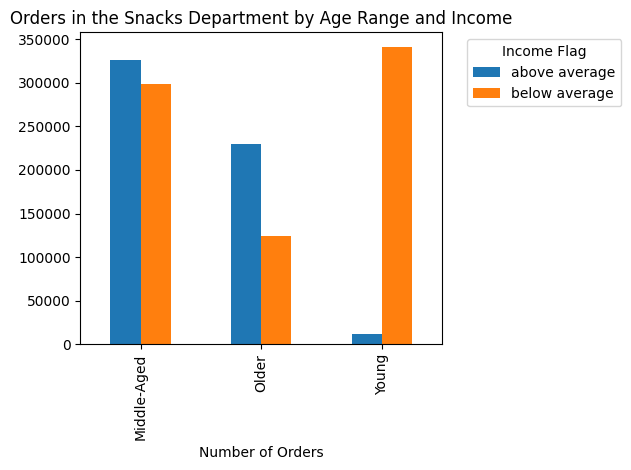

In [66]:
# Grouped bar chart showing total snack sales by 'age_range' and 'income_flag'

# Filter the data for the 'snacks' department
snacks_data = df[df['department'] == 'snacks']

# Grouping the data by 'age_range' and 'income_flag' and counting unique orders
grouped_data = snacks_data.groupby(['age_range', 'income_flag'])['order_id'].nunique().unstack(fill_value=0)

# Creating a grouped horizontal bar chart
plt.figure(figsize=(10, 8))
grouped_data.plot(kind='bar', stacked=False)

plt.xlabel('Number of Orders')
plt.ylabel('')
plt.title('Orders in the Snacks Department by Age Range and Income')

plt.legend(title='Income Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [70]:
grouped_data

income_flag,above average,below average
age_range,,
Middle-Aged,326125,298401
Older,229549,123815
Young,11923,340804


<Figure size 1000x800 with 0 Axes>

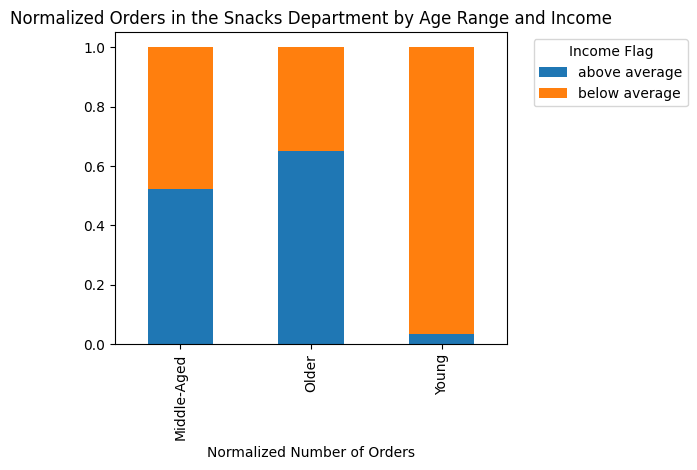

In [75]:
# Stacked bar chart showing total snack sales by 'age_range' and 'income_flag' (normalized)

# Filter the data for the 'snacks' department
snacks_data = df[df['department'] == 'snacks']

# Grouping the data by 'age_range' and 'income_flag' and counting unique orders
grouped_data = snacks_data.groupby(['age_range', 'income_flag'])['order_id'].nunique().unstack(fill_value=0)

# Calculating the total number of orders for each age range and income flag
total_orders_by_age_income = grouped_data.sum(axis=1)

# Normalizing the grouped data by dividing by the total number of orders within each group
normalized_grouped_data = grouped_data.div(total_orders_by_age_income, axis=0)

# Creating a stacked vertial bar chart for normalized data
plt.figure(figsize=(10, 8))
normalized_grouped_data.plot(kind='bar', stacked=True) 
plt.xlabel('Normalized Number of Orders')
plt.ylabel('')
plt.title('Normalized Orders in the Snacks Department by Age Range and Income')

plt.legend(title='Income Flag', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'snack_orders_by_age_income_normalized.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()


In [71]:
normalized_grouped_data

income_flag,above average,below average
age_range,,
Middle-Aged,0.522196,0.477804
Older,0.649611,0.350389
Young,0.033802,0.966198


## I will next, in a new notebook, continue to look at customer profiles against other departments, such as 'alcohol.' And, hopefully, revisit number 7 to find mean, max, and min on the customer profiles for level for usage frequency and expenditure.